In [1]:
import pandas as pd
import csv
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import ast

Analisis de imagenes clasificadas

In [2]:
#Leemos nuestros archivo de imagenes csv
archivo_imagenes = 'imagenes.csv'
with open(archivo_imagenes, encoding='utf-8') as data_set:
    reader = csv.reader(data_set, delimiter=',')
    encabezado, datos = next(reader), list(reader)

In [3]:
#A partir del archivo csv leido creamos el primer data set y lo imprimimos en pantalla
data_set = pd.read_csv(archivo_imagenes, encoding='utf-8')
data_set

,Ubicación,Descripción,Resolución,Tamaño,Tipo,Etiquetas,Ultimo Perfil,Fecha
0,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,Configuracion,"(1200, 1200)",142085,png,#hola #chau,tripero,10/06/2023
1,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,asd,"(750, 969)",25119,png,#asd #asd #asd,t2,11/06/2023
2,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,NaN,"(1200, 1200)",8580,png,#qwe #qw #q,t2,11/06/2023
3,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,NaN,"(750, 969)",236873,png,#asd,tripero,14/06/2023
4,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,asd,"(750, 969)",86564,png,#cvb,tripero,14/06/2023
5,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,NaN,"(1200, 1200)",31473,png,#awfrqwr #hola,tripero,15/06/2023
6,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,NaN,"(1000, 1000)",47913,png,#awfwef,t2,14/06/2023
7,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,NaN,"(750, 969)",76794,png,#kok,sdf,14/06/2023
8,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,NaN,"(268, 252)",740,png,NaN,t2,14/06/2023
9,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,NaN,"(750, 969)",67466,png,#asdf #,tripero,15/06/2023


Gráfico de torta que muestra los porcentajes según el tipo de imagen

In [4]:
tipo_imagen = data_set['Tipo'].value_counts().sort_values(ascending=False) #extraemos los tipos, los contamos y los ordenamos de manera descendente
tipos = list(tipo_imagen.index) #listamos los tipos para la leyenda a un costado del grafico

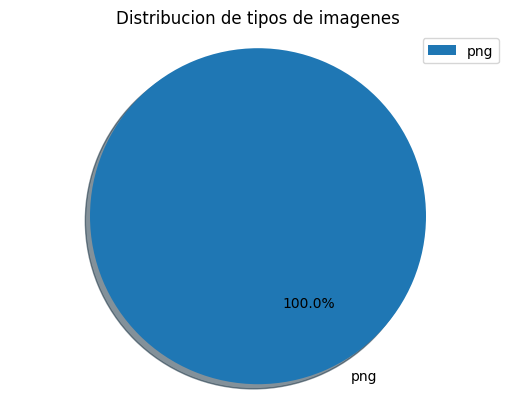

In [5]:
#creamos el grafico de torta con los datos extraidos en la celda anterior
plt.pie(tipo_imagen,labels = tipos,autopct='%1.1f%%',shadow=True, startangle=120, labeldistance= 1.1)
plt.axis('equal')
plt.legend(tipos)
plt.title("Distribucion de tipos de imagenes")
plt.show()

In [6]:
Calculo de los valores máximos de ancho y de alto de las imágenes clasificadas

SyntaxError: invalid syntax (639182109.py, line 1)

In [ ]:
#Extraemos las resoluciones del data set y las listamos
resoluciones = list(data_set['Resolución'])
resoluciones

In [ ]:
#Como es una lista de strings, no de tuplas que es lo que queremos hacemos una serie de pasos en una linea de codigo
#Para convertilas en tuplas de enteros
#Hacemos un tuple de cada uno de los valores pasados a enteros 
tuplas = [tuple(map(int, tupla.strip('()').split(', '))) for tupla in resoluciones]
tuplas

In [ ]:
#Ahora con la lista de tuplas calculamos el alto y el ancho maximo
maximo_alto = max(resolucion[0] for resolucion in tuplas)
maximo_ancho = max(resolucion[1] for resolucion in tuplas)
print('La maxima altura es', maximo_alto, 'px')
print('El maximo ancho es', maximo_ancho, 'px')

Se informa cuáles son los 3 tags más utilizados

In [47]:
#Extraemos los tags del data set y eliminamos con dropna los valores NaN
tags = data_set['Etiquetas']
tags=tags.dropna()
tags

0       #hola #chau
1    #asd #asd #asd
2       #qwe #qw #q
3              #asd
4              #cvb
5    #awfrqwr #hola
6           #awfwef
7              #kok
9           #asdf #
Name: Etiquetas, dtype: object

In [48]:
#Ahora con estos datos extraidos hacemos un join para unirlos en una lista eliminandoles los numerales con replace
lista_tags = ' '.join(list(tags)).replace('#','').split()
lista_tags

['hola',
 'chau',
 'asd',
 'asd',
 'asd',
 'qwe',
 'qw',
 'q',
 'asd',
 'cvb',
 'awfrqwr',
 'hola',
 'awfwef',
 'kok',
 'asdf']

In [49]:
#Con esta lista creamos un nuevo data frame llamado df_tags
datos_tags = {'etiquetas': lista_tags}
df_tags = pd.DataFrame(data=datos_tags)
df_tags

,etiquetas
0,hola
1,chau
2,asd
3,asd
4,asd
5,qwe
6,qw
7,q
8,asd
9,cvb


In [50]:
#De este data frame calculamos los mas populares con un value counts en descendente y extrayendo solo los 3 primeros
mas_populares = df_tags['etiquetas'].value_counts().sort_values(ascending=False).head(3)
mas_populares

asd     4
hola    2
chau    1
Name: etiquetas, dtype: int64

In [51]:
#Con estos tres datos mas populares creamos un data frame nuevo listo para mostrar como resultado
datos_mas_populares = {'etiqueta': list(mas_populares.index), 'usos': list(mas_populares.values)}
tres_mas_populares = pd.DataFrame(data=datos_mas_populares, index=['1','2','3'])


Resultado:

In [52]:
tres_mas_populares

,etiqueta,usos
1,asd,4
2,hola,2
3,chau,1


Con la lista de tags generar una nube de palabras

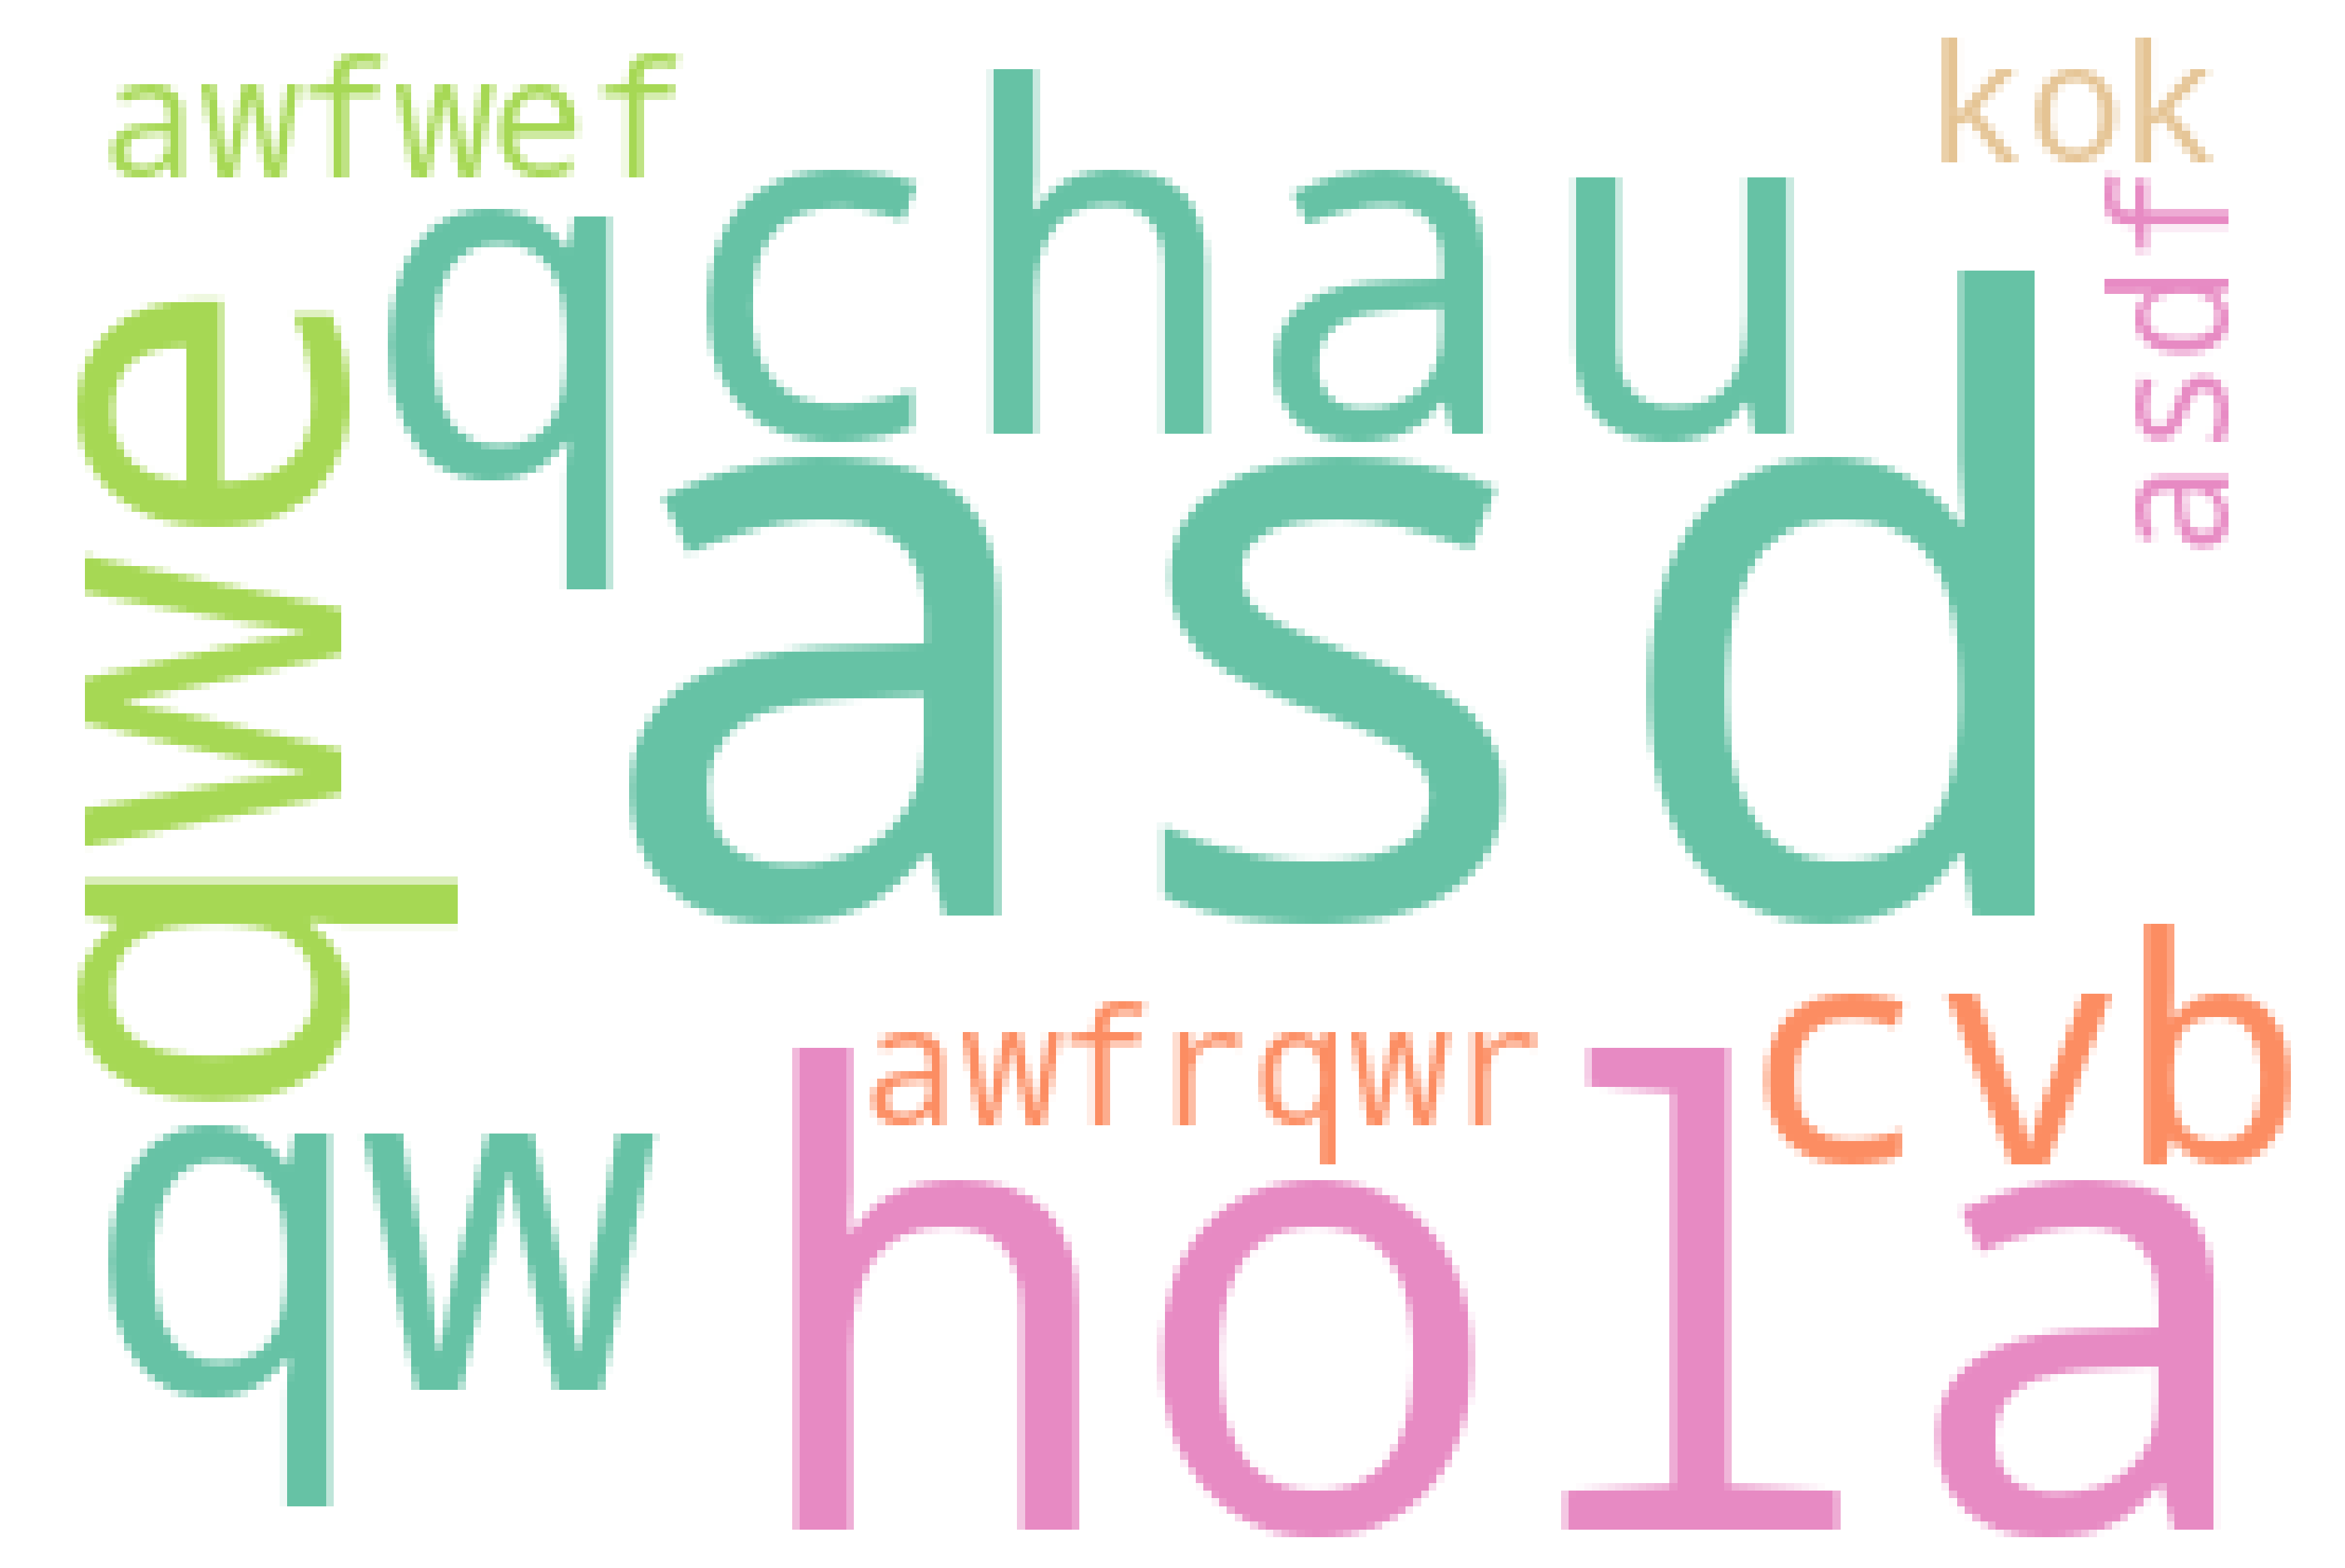

In [20]:
#Usamos como texto la lista de tags antes extraida para calcular el punto anterior y con wordcloud graficamos
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");
text = ' '.join(list(tags)).replace('#','')

# Generate wordcloud
wordcloud = WordCloud(width = 300, height = 200, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

Generar un gráfico de dispersión para visualizar la relación entre el ancho y el alto
de las imágenes

In [21]:
#A partir del DataSet principal creamos un nuevo dataFrame extrayendo la resolucion separando el ancho y la altura de las imagenes 
#
df_resoluciones = pd.DataFrame(data = {'Altura': data_set['Resolución'].apply(lambda x:eval(x)[0]), 'Ancho': data_set['Resolución'].apply(lambda x:eval(x)[1])})

In [22]:
df_resoluciones

,Altura,Ancho
0,1200,1200
1,750,969
2,1200,1200
3,750,969
4,750,969
5,1200,1200
6,1000,1000
7,750,969
8,268,252
9,750,969


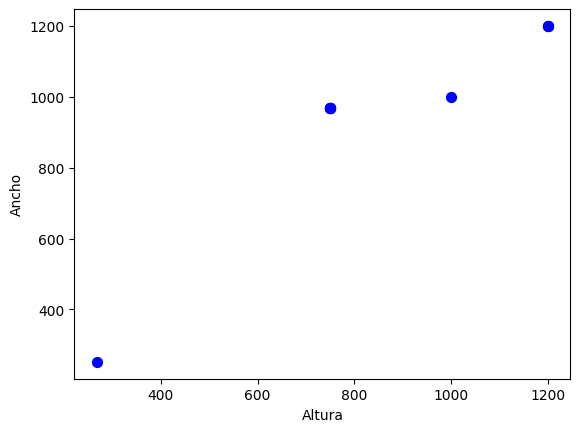

In [23]:
#Con la tabla de dos variables ya podemos hacer el grafico de dispersion entre ancho y altura
grafico_dispersion = df_resoluciones.plot.scatter(x='Altura',y='Ancho',c='Blue',s=50)
grafico_dispersion.plot()
plt.show()

Crear un gráfico de líneas para visualizar la evolución de la cantidad de
actualizaciones a lo largo del tiempo

In [24]:
#Para este caso vamos a necesitar el archivo csv de logs del sistema (perfiles.csv)
archivo_perfiles = 'perfiles.csv'
with open(archivo_perfiles, encoding='utf-8') as data_set2:
    reader = csv.reader(data_set2, delimiter=',')
    encabezado, datos = next(reader), list(reader)

In [26]:
#Creamos el dataFrame nuevo para perfiles
data_set2 = pd.read_csv(archivo_perfiles, encoding='utf-8')

In [27]:
data_set2

,Fecha,Hora,Nick,Operacion,Nombre foto
0,14/06/2023,20:18:02.423236,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
1,14/06/2023,20:18:09.082932,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
2,14/06/2023,20:18:14.466234,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
3,14/06/2023,20:18:28.216959,t2,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
4,14/06/2023,20:18:33.737998,t2,Creo,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
5,14/06/2023,20:18:37.554535,t2,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
6,14/06/2023,20:18:42.884402,t2,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
7,15/06/2023,08:36:53.661797,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
8,15/06/2023,08:37:12.583191,tripero,Creo,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
9,15/06/2023,08:37:26.302342,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...


In [31]:
#Extraemos solo las opreciones de actualizacion 
actualizaciones = data_set2[(data_set2['Operacion']== 'Actualizacion')]
#Las agrupamos por fecha y las contabilizamos
actualizaciones = actualizaciones.groupby(['Fecha']).count()
#Nos quedamos solo con la columna de operacion
actualizaciones = actualizaciones['Operacion']
actualizaciones

Fecha
14/06/2023    6
15/06/2023    3
Name: Operacion, dtype: int64

<Axes: xlabel='Fecha de actualizacion', ylabel='Cantidad de actualizaciones'>

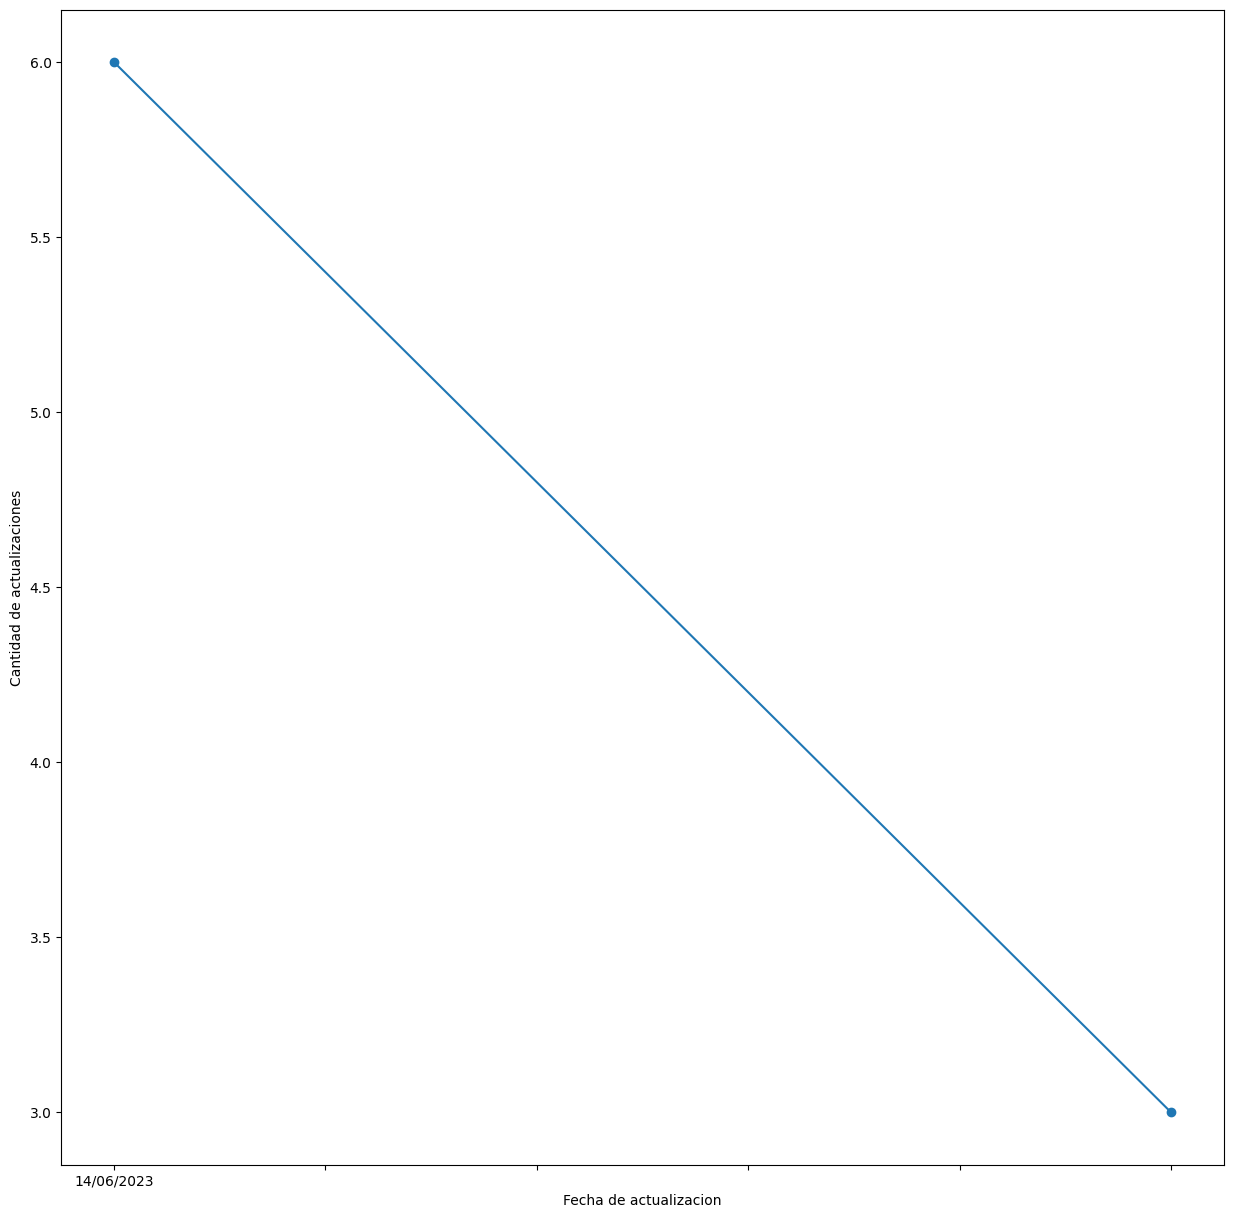

In [33]:
#Creamos el plot de 15x15 con sus respectivos labels
actualizaciones.plot(figsize=(15,15), xlabel='Fecha de actualizacion', ylabel='Cantidad de actualizaciones', marker='o')

En base a la fecha de última actualización, cantidad de cambios realizados para
cada día de la semana

In [37]:
#Del segundo data set solo queremos las modficaciones, esto quiere decir las actualizaciones
modificaciones = data_set2[(data_set2['Operacion']== 'Actualizacion')]
modificaciones

,Fecha,Hora,Nick,Operacion,Nombre foto
0,14/06/2023,20:18:02.423236,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
1,14/06/2023,20:18:09.082932,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
2,14/06/2023,20:18:14.466234,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
3,14/06/2023,20:18:28.216959,t2,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
5,14/06/2023,20:18:37.554535,t2,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
6,14/06/2023,20:18:42.884402,t2,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
7,15/06/2023,08:36:53.661797,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
9,15/06/2023,08:37:26.302342,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
10,15/06/2023,09:05:03.286076,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...


In [38]:
#Limpio las columnas de hora, nombre y nick que no me interesan
modificaciones = modificaciones.drop('Hora',axis=1).drop('Nick',axis=1).drop('Nombre foto',axis=1)
modificaciones

,Fecha,Operacion
0,14/06/2023,Actualizacion
1,14/06/2023,Actualizacion
2,14/06/2023,Actualizacion
3,14/06/2023,Actualizacion
5,14/06/2023,Actualizacion
6,14/06/2023,Actualizacion
7,15/06/2023,Actualizacion
9,15/06/2023,Actualizacion
10,15/06/2023,Actualizacion


In [39]:
#Convierto el formato de fecha para usar la funcion day_name
modificaciones['Fecha'] = pd.to_datetime(modificaciones['Fecha'], format='%d/%m/%Y')
# Obtengo el dia de la semana con day_name y lo inserto como columna en el dataframe
modificaciones['Dia'] = modificaciones['Fecha'].dt.day_name()
#Ya no necesito fecha asi que la podemos eliminar de estea df
modificaciones = modificaciones.drop('Fecha',axis=1)
modificaciones

,Operacion,Dia
0,Actualizacion,Wednesday
1,Actualizacion,Wednesday
2,Actualizacion,Wednesday
3,Actualizacion,Wednesday
5,Actualizacion,Wednesday
6,Actualizacion,Wednesday
7,Actualizacion,Thursday
9,Actualizacion,Thursday
10,Actualizacion,Thursday


<Axes: xlabel='Dia'>

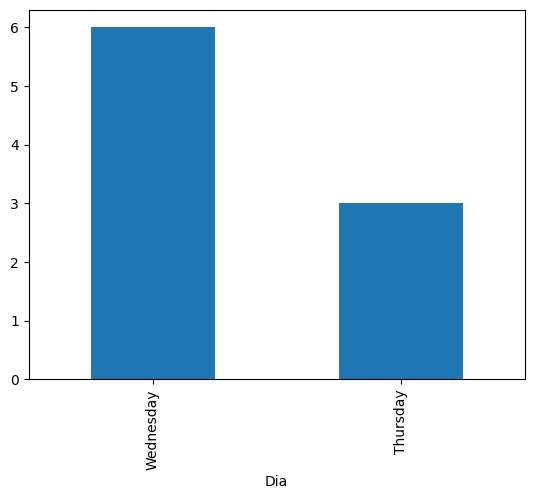

In [40]:
#Cuante las modificaciones por columna dia y las ploteo en forma de barra
mod_agrupadas = modificaciones.value_counts('Dia')
mod_agrupadas.plot(kind="bar")

Calculo del tamaño en bytes promedio de las imágenes actualizadas por cada perfil,
incluir los perfiles que no hayan realizado actualizaciones

In [41]:
#Del dataset2 filtramos solo las que son de actualizacion
actualizaciones = data_set2[(data_set2['Operacion']== 'Actualizacion')]
#eliminamos las columnas de hora y fecha que no las necesitamos
actualizaciones = actualizaciones.drop('Hora',axis=1).drop('Fecha',axis=1)
actualizaciones
#Ahora hacemos un join entre los dos csv con merge

,Nick,Operacion,Nombre foto
0,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
1,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
2,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
3,t2,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
5,t2,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
6,t2,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
7,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
9,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...
10,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...


In [42]:
data_set = data_set.rename(columns={'Ubicación': 'Nombre foto'})
#Cambiamos el nombre para poder hacer un join con la palabra clave de nombre foto entre ambos dataframes


In [44]:
#Realizo el join con Nombre foto'
df_unido = pd.merge(actualizaciones, data_set, on='Nombre foto')
df_unido=df_unido.drop('Etiquetas',axis=1).drop('Tipo',axis=1).drop('Descripción',axis=1).drop('Fecha',axis=1).drop('Resolución',axis=1).drop('Ultimo Perfil',axis=1)
#Mostramos el nuevo df producto del merge
df_unido

,Nick,Operacion,Nombre foto,Tamaño
0,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,31473
1,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,31473
2,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,31473
3,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,25119
4,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,76794
5,t2,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,76794
6,t2,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,142085
7,t2,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,8580
8,tripero,Actualizacion,/home/alumno/Escritorio/Ultimo/grupo28/segunda...,67466


In [45]:
#Ahora como vamos a necesitar todos los perfiles a pesar de que no hayan actualizado fotos los traemos del archivo json
import json
with open('perfiles.json') as file:
    perfiles = json.load(file)
#Extraemos los nicks en una lista para posterior mente crear un nuevo data frame 
nicks = list(map(lambda n: n['Alias'], perfiles))
nicks

['tripero', 't2', 'sdf']

In [55]:
#Calculamos el tamaño de promedio de cada imagen actualizada por cada usuario
def calcular_promedio(nick):
    sus_imagenes = df_unido[(df_unido['Nick']==nick)]#filtro por nick
    promedio = sus_imagenes['Tamaño'].mean() #calculo usando mean()
    return promedio

promedios = [ calcular_promedio(nick) for nick in nicks] #para cada nick calculo su promedio

datos = {'Perfil':nicks, 'Tamaño promedio': promedios} #creamos el data frame

df_promedios = pd.DataFrame(data=datos).fillna(0) #a las columnas NaN las rellenamos con un 0
df_promedios

,Perfil,Tamaño promedio
0,tripero,43966.333333
1,t2,75819.666667
2,sdf,0.000000
